In [1]:
import pandas as pd 
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [2]:
init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv("911.csv")
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
df['desc'].value_counts().head()

CITY AVE & CARDINAL AVE;  LOWER MERION; Station 313; 2019-04-30 @ 15:11:01;        5
WALDEN POND WAY & WOODVIEW LN; TOWAMENCIN; 2017-09-27 @ 17:54:55-Station:STA76;    4
GERMANTOWN PIKE; WORCESTER; 2017-09-27 @ 17:50:24-Station:STA83;                   4
GREEN ST & E BASIN ST;  NORRISTOWN; Station 308A; 2016-05-10 @ 20:23:26;           4
MANATAWNY ST & GROSSTOWN RD; WEST POTTSGROVE; 2019-04-25 @ 22:20:16;               3
Name: desc, dtype: int64

In [6]:
df['desc'].head()

0    REINDEER CT & DEAD END;  NEW HANOVER; Station ...
1    BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...
2    HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...
3    AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...
4    CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...
Name: desc, dtype: object

In [7]:
mf ="CITY AVE & CARDINAL AVE;  LOWER MERION; Station 313; 2019-04-30 @ 15:11:01;"
mf.split(';')[3]



' 2019-04-30 @ 15:11:01'

In [8]:
mf.split(';')[3].replace('@ ','')

' 2019-04-30 15:11:01'

In [9]:
def Datime(y):
    return y.split(';')[3].replace('@ ','')

In [10]:
Datime('CITY AVE & CARDINAL AVE;  LOWER MERION; Station 313; 2019-04-30 @ 15:11:01;')

' 2019-04-30 15:11:01'

In [11]:
df['timeStamps'] = df['desc'].apply(lambda x: Datime(x))

In [12]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,timeStamps
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10 17:10:52
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10 17:29:21
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12-10 16:47:36
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015-12-10 16:56:52


In [13]:
type(df['timeStamp'].head()[1])

str

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [15]:
type(df['timeStamp'].head()[1])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
v = df['timeStamp'].head()[1]

In [17]:
v.date

<function Timestamp.date>

In [18]:
pd.to_datetime(df['timeStamp']).apply(lambda x: x.date())

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: timeStamp, Length: 663522, dtype: object

In [19]:
df['Hour'] = df['timeStamp'].apply(lambda Hour: Hour.hour) 
df['Month'] = df['timeStamp'].apply(lambda Month: Month.month)
df['Day of week'] = df['timeStamp'].apply(lambda Dayofweek: Dayofweek.dayofweek)
df['Date'] = pd.to_datetime(df['timeStamp']).apply(lambda x: x.date())

In [21]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,timeStamps,Hour,Month,Day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10 17:10:52,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10 17:29:21,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,,14,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12-10 16:47:36,16,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015-12-10 16:56:52,16,12,3,2015-12-10


In [22]:
df['Day of week'].unique()

array([3, 4, 5, 6, 0, 1, 2])

In [23]:
df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [24]:
ddmap = {0:"Mon",1:"Tue",2:"Wed",3:"Thur",4:"Fri",5:"Sat",6:"Sun"}
df['Day of week']=df['Day of week'].map(ddmap)

In [25]:
dmmap = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"July",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"}
df['Month']=df['Month'].map(dmmap)

In [26]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,timeStamps,Hour,Month,Day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10 17:10:52,17,Dec,Thur,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10 17:29:21,17,Dec,Thur,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,,14,Dec,Thur,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12-10 16:47:36,16,Dec,Thur,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015-12-10 16:56:52,16,Dec,Thur,2015-12-10


In [27]:
def ems(title):
    return title.split(':')[0]

In [28]:
ems('EMS: DIABETIC EMERGENCY')

'EMS'

In [29]:
df['Reasons'] = df['title'].apply(lambda x: ems(x))

In [30]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,timeStamps,Hour,Month,Day of week,Date,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10 17:10:52,17,Dec,Thur,2015-12-10,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10 17:29:21,17,Dec,Thur,2015-12-10,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,,14,Dec,Thur,2015-12-10,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12-10 16:47:36,16,Dec,Thur,2015-12-10,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015-12-10 16:56:52,16,Dec,Thur,2015-12-10,EMS


In [31]:
df.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,timeStamps,Hour,Month,Day of week,Date,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10 17:10:52,17,Dec,Thur,2015-12-10,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10 17:29:21,17,Dec,Thur,2015-12-10,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,,14,Dec,Thur,2015-12-10,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12-10 16:47:36,16,Dec,Thur,2015-12-10,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015-12-10 16:56:52,16,Dec,Thur,2015-12-10,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,2015-12-10 15:39:04,15,Dec,Thur,2015-12-10,EMS
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1,2015-12-10 16:46:48,16,Dec,Thur,2015-12-10,EMS
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,2015-12-10 16:17:05,16,Dec,Thur,2015-12-10,EMS
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,2015-12-10 16:51:42,16,Dec,Thur,2015-12-10,EMS
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,,17,Dec,Thur,2015-12-10,Traffic


In [32]:
df['Reasons'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reasons, dtype: int64

In [33]:
#saving the modyfied csv file
xd = df.to_csv("911_modyfied.csv")

In [34]:
df['desc'].unique()

array(['REINDEER CT & DEAD END;  NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;',
       'BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;',
       'HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-Station:STA27;', ...,
       'HAVERFORD STATION RD;  LOWER MERION; Station 313; 2020-07-29 @ 15:52:52;',
       'MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29 @ 15:54:08-Station:STA27;',
       'HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER MERION; 2020-07-29 @ 15:52:46;'],
      dtype=object)

<AxesSubplot:xlabel='Reasons', ylabel='count'>

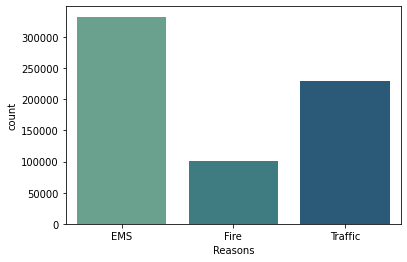

In [35]:
sns.countplot(x='Reasons',data=df,palette='crest')

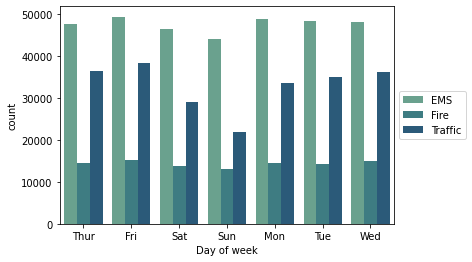

In [36]:
sns.countplot(x='Day of week', data=df,hue='Reasons',palette='crest')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

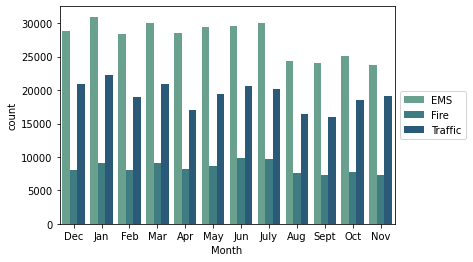

In [37]:
sns.countplot(x='Month', data=df,hue='Reasons',palette='crest')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [38]:
month = df.groupby('Month').count()

In [39]:
month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,timeStamps,Hour,Day of week,Date,Reasons
Month,,,,,,,,,,,,,,
Apr,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671,53671
Aug,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359,48359,48359
Dec,57692,57692,57692,50783,57692,57692,57667,57692,57692,57692,57692,57692,57692,57692
Feb,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427,55427
Jan,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336,62336
July,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832,59832,59832
Jun,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034,60034,60034
Mar,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027,60027
May,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509,57509


<AxesSubplot:xlabel='Month'>

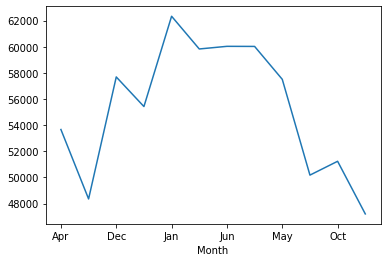

In [40]:
month['title'].plot()

In [41]:
byDate=df.groupby('Date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,timeStamps,Hour,Month,Day of week,Reasons
Date,,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444,444


<AxesSubplot:xlabel='Date'>

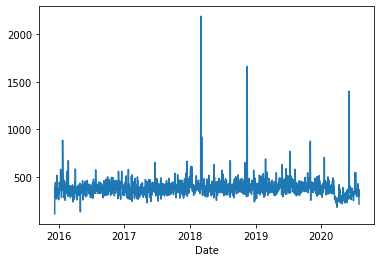

In [42]:
byDate['Reasons'].plot()

In [43]:
Reasons = df.groupby('Reasons').count().reset_index()
Reasons.head()

,Reasons,lat,lng,desc,zip,title,timeStamp,twp,addr,e,timeStamps,Hour,Month,Day of week,Date
0,EMS,332692,332692,332692,304855,332692,332692,332480,332692,332692,332692,332692,332692,332692,332692
1,Fire,100622,100622,100622,88867,100622,100622,100545,100622,100622,100622,100622,100622,100622,100622
2,Traffic,230208,230208,230208,189601,230208,230208,230204,230208,230208,230208,230208,230208,230208,230208


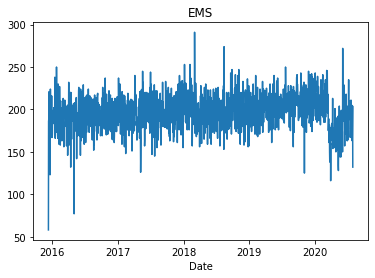

In [47]:
df[df['Reasons']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.show()

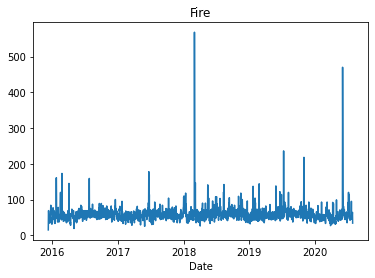

In [48]:
df[df['Reasons']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.show()

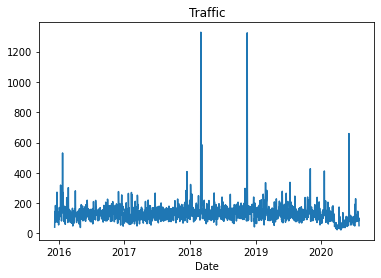

In [49]:
df[df['Reasons']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.show()

In [51]:
 df.groupby(by=['Day of week','Hour']).count()['Reasons'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thur,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


In [52]:
dayHour = df.groupby(by=['Day of week','Hour']).count()['Reasons'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day of week'>

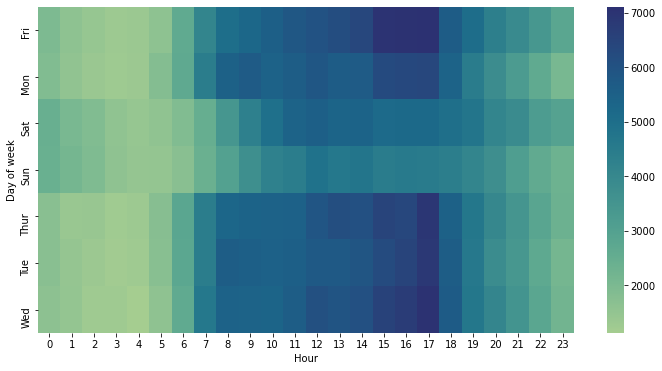

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayHour,cmap='crest')

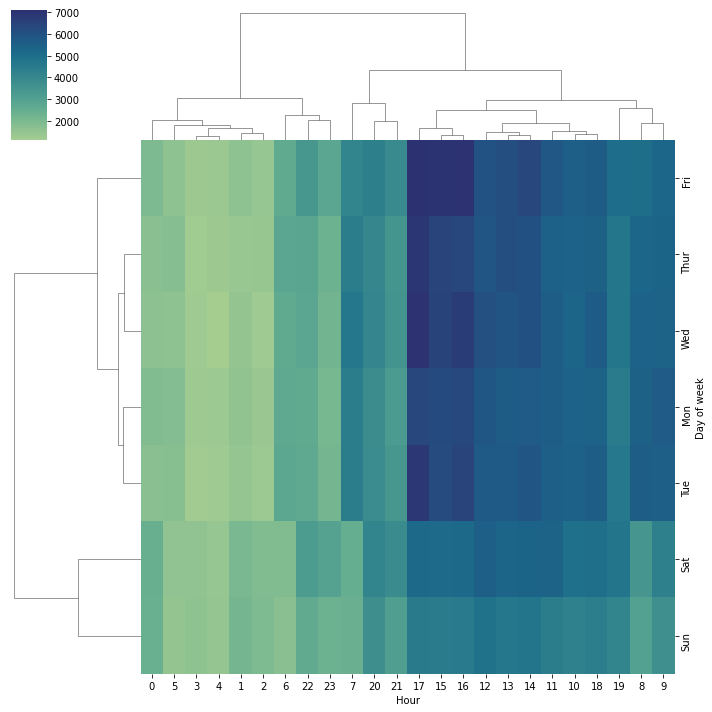

In [55]:
sns.clustermap(dayHour,cmap='crest')

In [56]:
df.groupby(by=['Day of week','Month']).count()['Reasons'].unstack()

Month,Apr,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sept
Day of week,,,,,,,,,,,,
Fri,7997,7336,9305,8255,9309,8681,9207,10941,8904,8379,6934,7694
Mon,8410,6854,8492,8747,8896,9499,8511,8060,7881,6722,8075,6598
Sat,7514,6111,8592,7593,8475,7748,8198,8050,7223,6773,6609,6566
Sun,6865,5275,7165,6452,7478,7859,6837,6766,6694,5196,6316,5956
Thur,7722,7508,8151,7997,9055,8378,9489,8849,8740,8358,7482,6954
Tue,7561,7291,8305,8087,9714,9086,8349,8372,9026,7344,7948,6601
Wed,7602,7984,7682,8296,9409,8581,9443,8989,9041,7410,7876,6844


In [57]:
bymonth = df.groupby(by=['Day of week','Month']).count()['Reasons'].unstack()

<AxesSubplot:xlabel='Month', ylabel='Day of week'>

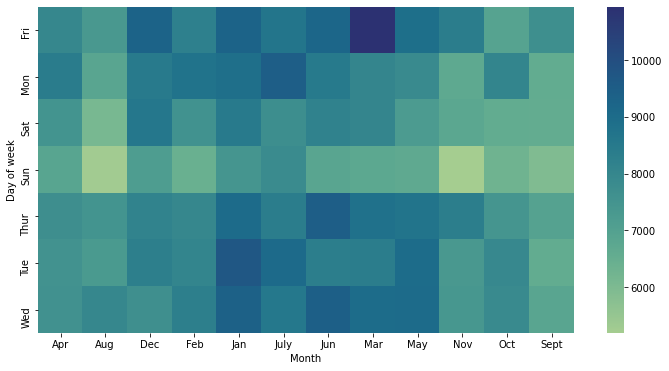

In [59]:
plt.figure(figsize=(12,6))
sns.heatmap(data=bymonth,cmap='crest')

<Figure size 864x432 with 0 Axes>

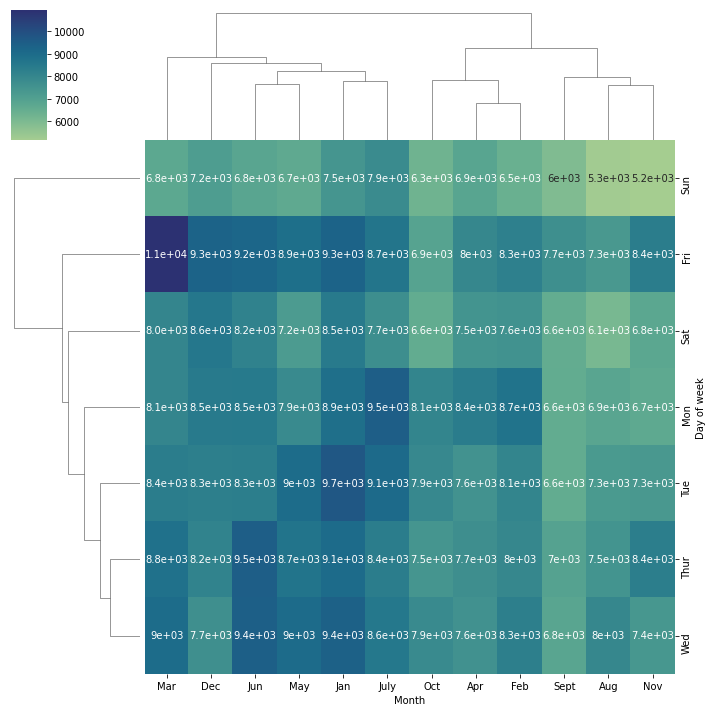

In [62]:
plt.figure(figsize=(12,6))
sns.clustermap(data=bymonth,cmap='crest',annot=True)